<a href="https://www.kaggle.com/paritoshharora/cfar100?scriptVersionId=90240124" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Import Libraries
import cudf as pd
import cupy as cp
from cuml.ensemble import RandomForestClassifier as cuRFC
from cuml.metrics.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist # reduce dimension and convert color to black and white
#Alexnet pe bhi chala ke dekhna h
!pip install ipyplot &> /dev/null
print ("ipyplot installed sucessfully!!")
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import ipyplot
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ipyplot installed sucessfully!!


In [2]:

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

169017344/169001437 [==============================] - 6s 0us/step


In [3]:
print(len(x_train))
print(len(x_test))
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

50000
10000
x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)



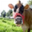
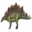
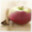
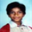


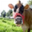
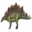
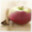
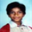

In [4]:
ipyplot.plot_images(x_train, max_images=4, img_width=120)

In [5]:
x_train = x_train.reshape(len(x_train),3*32*32)
x_test = x_test.reshape(len(x_test),3*32*32)
print(x_train.shape)
print(x_test.shape)
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000, 1)
(10000, 1)


In [6]:
RFC_model = cuRFC(max_features=1.0, #n estimator = no of trees 
                   n_bins=10,
                   n_estimators=40)
RFC_model.fit(x_train.astype('float32'),y_train.astype('float32'))
RFC_predict = RFC_model.predict(x_test.astype('float32'))

In [7]:
y_test = y_test.reshape(1,len(y_test))[0]
print(y_test)
print(type(y_test))

[49 33 72 ... 51 42 70]
<class 'numpy.ndarray'>


In [8]:
accuracy_score(y_test,RFC_predict)

0.1897

In [9]:
confusion_matrix(y_test,RFC_predict)

array([[47,  1,  0, ...,  0,  0,  0],
       [ 1, 28,  0, ...,  2,  0,  0],
       [ 0,  0, 16, ...,  4,  4,  3],
       ...,
       [ 0,  0,  2, ..., 11,  1,  0],
       [ 3,  0,  5, ...,  2,  7,  0],
       [ 0,  0,  0, ...,  2,  0, 22]])

In [10]:
print(classification_report(y_test,RFC_predict,zero_division=0))

              precision    recall  f1-score   support

           0       0.33      0.47      0.39       100
           1       0.21      0.28      0.24       100
           2       0.14      0.16      0.15       100
           3       0.12      0.20      0.15       100
           4       0.10      0.09      0.10       100
           5       0.08      0.07      0.07       100
           6       0.16      0.14      0.15       100
           7       0.16      0.17      0.16       100
           8       0.25      0.13      0.17       100
           9       0.30      0.21      0.25       100
          10       0.09      0.04      0.05       100
          11       0.18      0.10      0.13       100
          12       0.13      0.13      0.13       100
          13       0.14      0.11      0.12       100
          14       0.08      0.07      0.07       100
          15       0.11      0.05      0.07       100
          16       0.29      0.18      0.22       100
          17       0.18    